# Modeling - Regression

Authors: 
Info: 
Notes: 

In [72]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
final_df = pd.read_csv('/work/final.csv')
final_df = final_df.sort_values(by=['state_abbr', 'year'])

In [3]:
final_df

,year,state_abbr,Total Population 1 Year and Over,Total Population (Educational Attainment),Bachelor's Degree or Higher (Educational Attainment),Same House 1 Year Ago,Moved Within Same County,Moved From Different County (Same State),Moved From Different State,Moved From Abroad,Foreign-Born,Median Age of Movers,Movers With Bachelor's Degree or Higher,Movers Under Age 35,GDP
0,2013,AL,4781296,3225447,476016,239928,817537,498384,612773,608333,419711,2317408,186501,59782,206962.9
12,2014,AL,4791931,3256766,478058,233714,817440,484011,615948,613234,434244,2319734,187773,54716,206070.0
24,2015,AL,4801599,3282252,504626,227742,823286,468319,624472,612193,450119,2322438,188647,61631,208950.3
36,2016,AL,4810126,3300713,506680,233469,812874,463070,629565,598269,465669,2331186,196096,59611,212862.8
48,2017,AL,4819343,3309607,528019,233493,805164,471079,628878,596006,480913,2333055,198907,67037,216615.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2018,WV,1787630,1280781,163614,75720,269303,161826,209002,218803,215290,886178,25569,14303,77406.5
83,2019,WV,1773280,1281086,161686,72681,267270,152243,211267,219899,217526,876749,26607,14764,77162.2
95,2021,WV,1767792,1265439,179376,73617,272608,156128,201957,222511,226586,878660,30118,13819,75765.1
107,2022,WV,1758432,1262566,188793,70745,264074,161047,207092,216666,224674,873674,33857,18768,77188.0


In [5]:
# checking for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

features_df = numeric_df.drop('GDP', axis=1)
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features_df)

# vif calculation
vif = pd.DataFrame()
vif["features"] = features_df.columns
vif["VIF"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]

print(vif)

NameError: name 'numeric_df' is not defined

Prepare the Data by splitting features (X) and labels (y)

In [78]:
# Geographic Mobility Measures: Pct is comparable across States
final_df['Pct_Moved_Different_State'] = final_df['Moved From Different State'] / final_df['Total Population 1 Year and Over']
final_df['Pct_Moved_Same_County'] = final_df['Moved Within Same County'] / final_df['Total Population 1 Year and Over']
final_df['Pct_Moved_Different_County'] = final_df['Moved From Different County (Same State)'] / final_df['Total Population 1 Year and Over']
final_df['Pct_Moved_Abroad'] = final_df['Moved From Abroad'] / final_df['Total Population 1 Year and Over']
final_df['Pct_Foreign_Born'] = final_df['Foreign-Born'] / final_df['Total Population 1 Year and Over']

# Education & Demographic Measures
final_df['Pct_Bachelors_Degree'] = final_df['Bachelor\'s Degree or Higher (Educational Attainment)'] / final_df['Total Population (Educational Attainment)']
final_df['Pct_Movers_Bachelors'] = final_df['Movers With Bachelor\'s Degree or Higher'] / final_df['Total Population 1 Year and Over']
final_df['Pct_Movers_Under_35'] = final_df['Movers Under Age 35'] / final_df['Total Population 1 Year and Over']

# GDP growth by State per year
final_df['GDP_Growth'] = final_df.groupby('state_abbr')['GDP'].pct_change()

Train Test Split

In [93]:
# Drop 2013 from GDP Growth
final_df = final_df[final_df['year'] != 2013]

X = final_df.drop(columns=['year', 'state_abbr', 'Total Population 1 Year and Over',
       'Total Population (Educational Attainment)',
       "Bachelor's Degree or Higher (Educational Attainment)",
       'Same House 1 Year Ago', 'Moved Within Same County',
       'Moved From Different County (Same State)',
       'Moved From Different State', 'Moved From Abroad', 'Foreign-Born',
       'Median Age of Movers', "Movers With Bachelor's Degree or Higher",
       'Movers Under Age 35', 'GDP'])  
y = final_df['GDP_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling 

In [96]:
# Fit and Transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Implement a Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1.4718044177277455e-34
Root Mean Squared Error: 1.2131794664136653e-17
R-squared: 1.0


In [102]:
# Implement Ridge Regression 

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1.2162018172626058e-08
Root Mean Squared Error: 0.00011028154048899598
R-squared: 0.9999379845377696


In [105]:
# Implement Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rd_model = RandomForestRegressor(n_estimators=100, random_state=42)
rd_model.fit(X_train_scaled, y_train)
y_pred = rd_model.predict(X_test_scaled)

# Evaluate the Model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1.022330799680906e-06
Root Mean Squared Error: 0.0010111037531731874
R-squared: 0.9947870233217339


Visualize Regressors

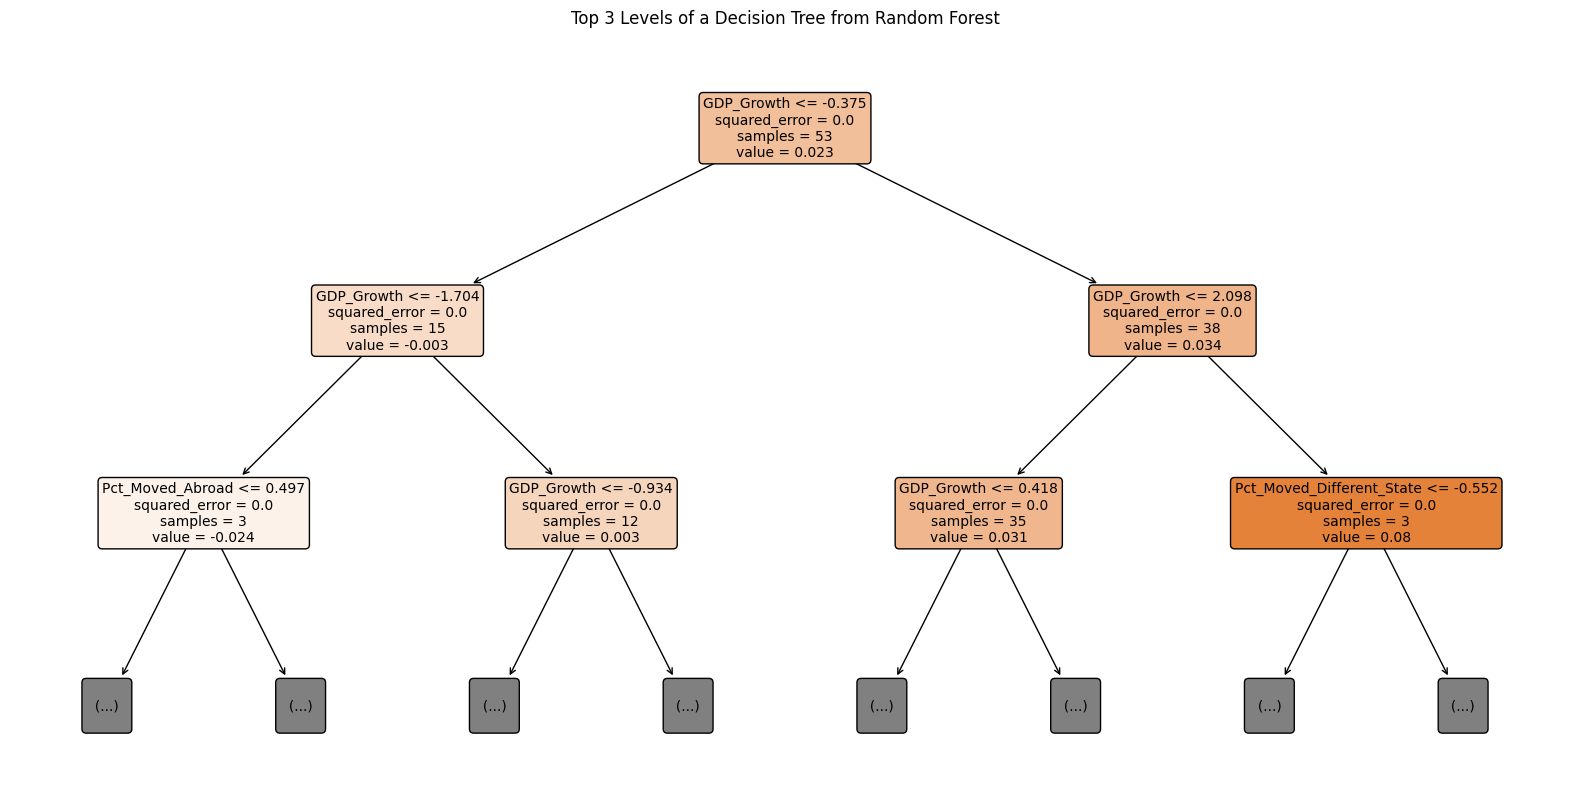

In [129]:
#Desicion Trees
tree_to_plot = rd_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, 
          feature_names=X.columns.tolist(),  
          filled=True, 
          rounded=True, 
          fontsize=10, 
          max_depth=2)
plt.title("Top 3 Levels of a Decision Tree from Random Forest")
plt.show()


/tmp/ipykernel_176/3191748557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


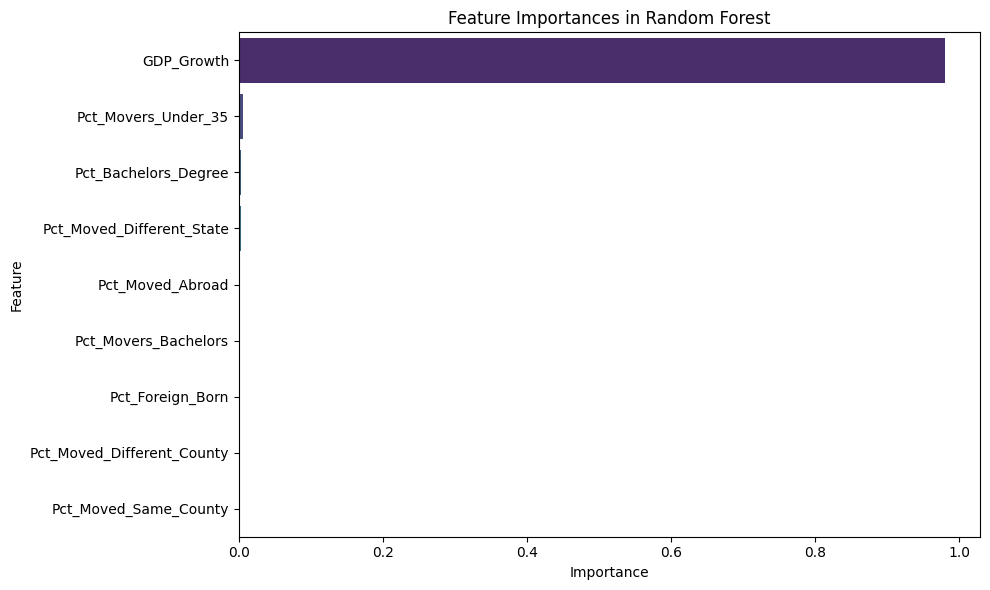

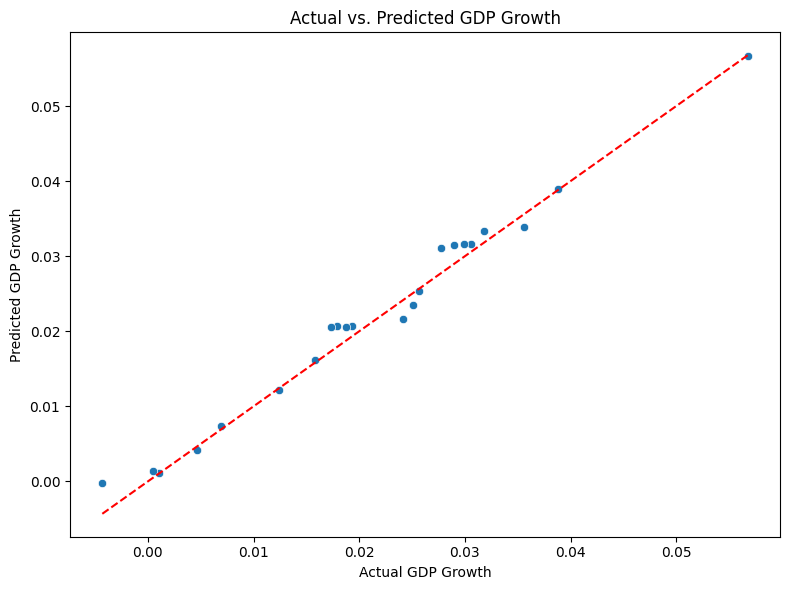

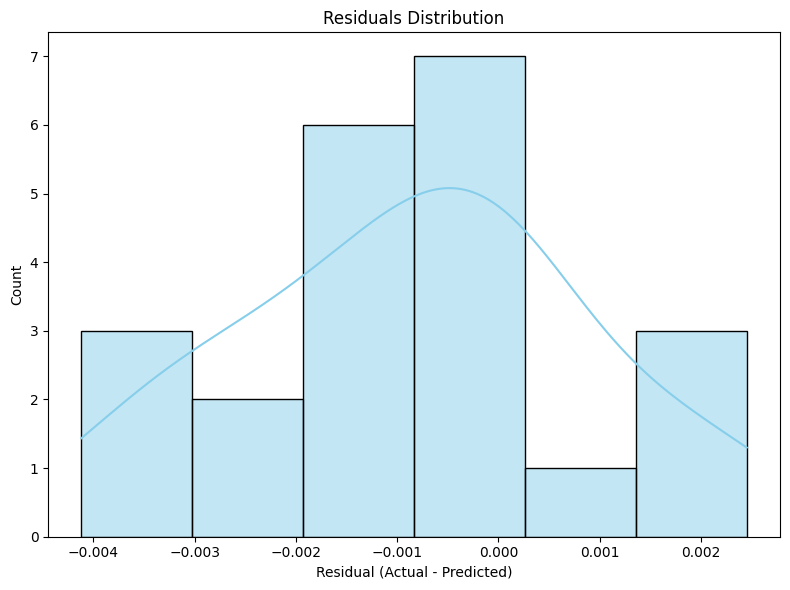

In [54]:

importance = rf_model.feature_importances_
feat_names = X.columns
feature_df = pd.DataFrame({'Feature': feat_names, 'Importance': importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importances in Random Forest')
plt.tight_layout()
plt.show()

# 2. Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual GDP Growth')
plt.ylabel('Predicted GDP Growth')
plt.title('Actual vs. Predicted GDP Growth')
plt.tight_layout()
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()